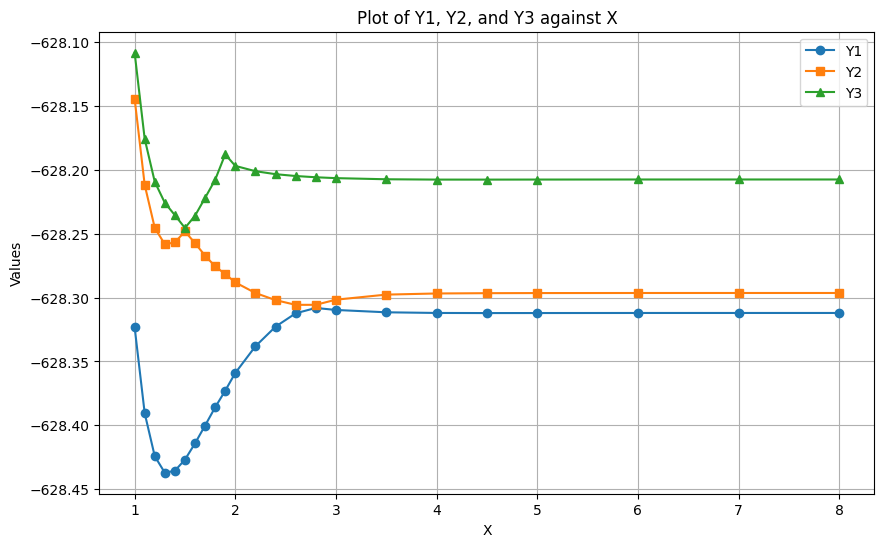

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/content/btp_data.csv")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df["X"], df["Y1"], marker='o', label="Y1")
plt.plot(df["X"], df["Y2"], marker='s', label="Y2")
plt.plot(df["X"], df["Y3"], marker='^', label="Y3")

# Labels and title
plt.xlabel("X")
plt.ylabel("Values")
plt.title("Plot of Y1, Y2, and Y3 against X")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [11]:
df.head()

,X,Y1,Y2,Y3,Y4
0,1.0,-628.323193,-628.144285,-628.108236,-628.072268
1,1.1,-628.390555,-628.211727,-628.175713,-628.140065
2,1.2,-628.424253,-628.245422,-628.209307,-628.173363
3,1.3,-628.437156,-628.258235,-628.225775,-628.185007
4,1.4,-628.435618,-628.256800,-628.235464,-628.184259


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

In [13]:
df = pd.read_csv('/content/btp_data.csv')

# Extract columns into numpy arrays
X = df['X'].values
Y1 = df['Y1'].values
Y2 = df['Y2'].values
Y3 = df['Y3'].values

In [14]:
tck1 = splrep(X, Y1, k=3)
tck2 = splrep(X, Y2, k=3)
tck3 = splrep(X, Y3, k=3)

In [5]:
x_dense = np.linspace(X.min(), X.max(), 300)
y1_spline = splev(x_dense, tck1)
y2_spline = splev(x_dense, tck2)
y3_spline = splev(x_dense, tck3)


In [15]:
# Function to generate piecewise functions
def generate_piecewise_functions(tck, X):
    t, c, k = tck
    equations = []
    for i in range(len(X) - 1):
        a0 = c[i]
        a1 = c[i + 1] - c[i]
        a2 = c[i + 2] - 2 * c[i + 1] + c[i]
        a3 = c[i + 3] - 3 * c[i + 2] + 3 * c[i + 1] - c[i]

        eq = f"S_{i + 1}(x) = {a0} + {a1}*(x - {X[i]}) + {a2}*(x - {X[i]})^2 + {a3}*(x - {X[i]})^3"
        equations.append(eq)
    return equations


In [16]:
def save_spline_data(filename, tck, X, Y_label):
    with open(filename, 'w') as f:
        f.write(f"=== Spline Weights for {Y_label} ===\n")
        f.write(f"Knots (t): {tck[0]}\n")
        f.write(f"Coefficients (c): {tck[1]}\n")
        f.write(f"Order (k): {tck[2]}\n\n")
        f.write(f"=== Piecewise Cubic Functions for {Y_label} ===\n")
        equations = generate_piecewise_functions(tck, X)
        for eq in equations:
            f.write(eq + "\n")

save_spline_data('spline_weights_Y1.txt', tck1, X, 'Y1')
save_spline_data('spline_weights_Y2.txt', tck2, X, 'Y2')
save_spline_data('spline_weights_Y3.txt', tck3, X, 'Y3')

print("Spline weights and piecewise functions saved to text files.")

Spline weights and piecewise functions saved to text files.


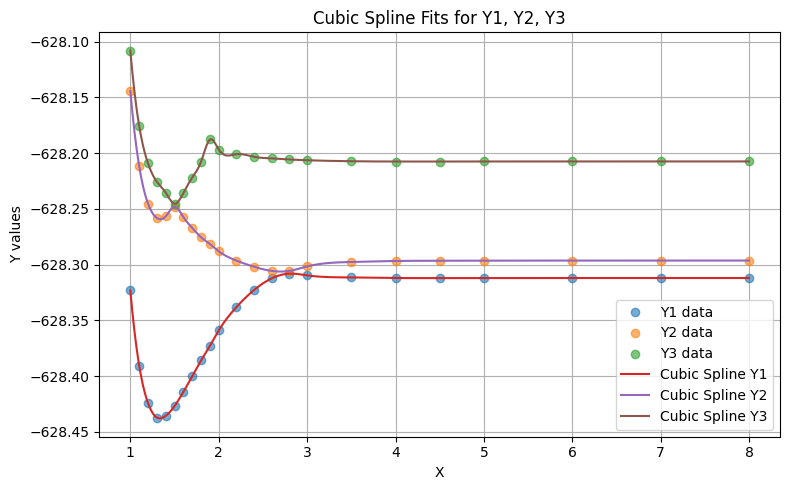

In [17]:
plt.figure(figsize=(8,5))

# Original data
plt.plot(X, Y1, 'o', label='Y1 data', alpha=0.6)
plt.plot(X, Y2, 'o', label='Y2 data', alpha=0.6)
plt.plot(X, Y3, 'o', label='Y3 data', alpha=0.6)

# Spline fits
plt.plot(x_dense, y1_spline, '-', label='Cubic Spline Y1')
plt.plot(x_dense, y2_spline, '-', label='Cubic Spline Y2')
plt.plot(x_dense, y3_spline, '-', label='Cubic Spline Y3')

plt.xlabel('X')
plt.ylabel('Y values')
plt.title('Cubic Spline Fits for Y1, Y2, Y3')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()